In [1]:
import os
import opsimsummary as oss
import healpy as hp
from opsimsummary import SynOpSim
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.units as u
import pickle
import astropy

## LSST survey dates 

<br>
Year 0  -  03/10/2023  -  MJD 60220 <br>
Year 1  -  03/10/2024  -  MJD 60586 <br>
Year 2  -  03/10/2025  -  MJD 60951 <br>
Year 3  -  03/10/2026  -  MJD 61316 <br>
Year 4  -  03/10/2027  -  MJD 61681 <br>
Year 5  -  03/10/2028  -  MJD 62047 <br>
Year 6  -  03/10/2029  -  MJD 62412 <br>
Year 7  -  03/10/2030  -  MJD 62777 <br>
Year 8  -  03/10/2031  -  MJD 63142 <br>
Year 9  -  03/10/2032  -  MJD 63508 <br>
Year 10 -  03/10/2033  -  MJD 63873 <br>

## Sky Pointings

Sample random points on the sphere between -90 < DEC < 40

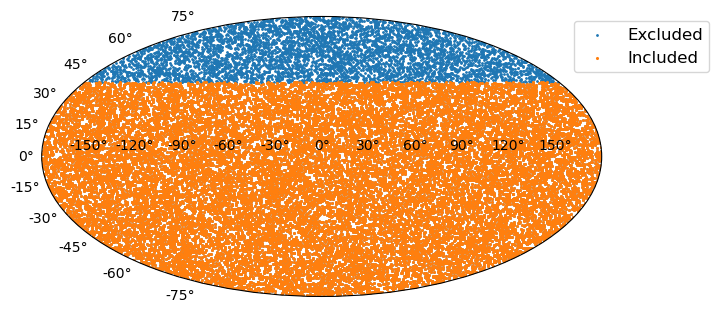

In [2]:
N = 30000

ra_points = coord.Angle(np.random.uniform(low=0, high=360, size=N) * u.degree)
ra_points = ra_points.wrap_at(180*u.degree)
dec_points = np.arcsin(2 * np.random.uniform(size=N) - 1) / np.pi * 180
dec_points = coord.Angle(dec_points * u.degree)

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(221, projection="mollweide")
im1 = ax1.scatter(ra_points.radian, dec_points.radian, s=1, label="Excluded")

# Exclude points outside of -90 < DEC < 40
dec_selection = (dec_points.degree > -90) & (dec_points.degree < 40)
ra_points = ra_points[dec_selection]
dec_points = dec_points[dec_selection]

im1 = ax1.scatter(ra_points.radian, dec_points.radian, s=1.5, label="Included")
plt.legend(loc=(0.95, 0.8), fontsize=12)


## OpSim Summary

In [3]:
myopsimv3 = '../data/OpSim_databases/baseline_v3.0_10yrs.db'


In [4]:
synopsim = SynOpSim.fromOpSimDB(myopsimv3, opsimversion='fbsv2', usePointingTree=True, use_proposal_table=False,
                               subset='unique_all')

 reading from database sqlite:///../data/OpSim_databases/baseline_v3.0_10yrs.db
We have filterNull set to False
checking that summary table read in

Reading in raw tables successful
replacing names works
dropping duplicates works
dithered column names exists 
Changing units for fbsv2 from degrees


In [5]:
gen = synopsim.pointingsEnclosing(ra_points.degree, dec_points.degree, circRadius=0., pointingRadius=1.75, 
                                  usePointingTree=True)


In [6]:
event = next(gen)
event

check using ptree True


,fieldRA,fieldDec,expMJD,flush_by_mjd,visitExposureTime,filter,rotSkyPos,rotSkyPos_desired,numExposures,airmass,...,moonRA,moonDec,moonDistance,solarElong,moonPhase,cummTelAz,scripted_id,_ra,_dec,intindex
obsHistID,,,,,,,,,,,,,,,,,,,,,
984168,224.041366,-6.320838,61905.229988,61905.252584,30.0,y,206.109377,206.109377,2,1.162981,...,301.908235,-19.649615,76.481312,165.843946,63.164527,40.342002,0,3.910260,-0.110319,984168
1779316,224.008658,-6.302123,63335.259644,63335.293147,30.0,u,201.435329,201.435329,1,1.094220,...,61.495624,18.893951,158.825952,157.705522,22.083963,8.291356,0,3.909689,-0.109993,1779316
771552,223.668362,-6.033340,61556.152100,61556.173794,30.0,r,242.222420,242.222420,2,1.108540,...,6.887002,7.663638,143.455283,152.146108,33.251132,21.424748,0,3.903749,-0.105302,771552
1827525,223.822288,-5.961249,63448.974421,63448.993019,30.0,i,130.352615,130.352615,2,1.113901,...,119.329213,15.825337,105.533244,90.504001,8.439526,-15.297834,0,3.906436,-0.104043,1827525
715608,224.121225,-6.104763,61472.403962,0.000000,30.0,r,150.031601,150.031601,2,1.139216,...,348.152948,-2.332489,123.482956,123.097043,1.512088,-24.575889,0,3.911653,-0.106548,715608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573730,226.220954,-3.794190,61229.100130,61229.107441,30.0,y,217.864497,217.864497,2,1.228786,...,16.943264,11.503025,150.004242,118.448135,47.556368,3.792876,0,3.948300,-0.066221,573730
115488,225.889508,-3.610219,60393.285241,60393.327530,30.0,i,85.056453,85.056453,2,1.141706,...,173.753394,5.178714,52.815368,137.579739,93.450807,56.725342,0,3.942516,-0.063010,115488
1156943,226.168734,-3.835221,62222.315455,62222.336544,30.0,y,106.167065,106.167065,2,1.116956,...,147.245505,9.460834,79.741357,139.854899,77.543282,76.853589,0,3.947389,-0.066937,1156943


In [7]:
event.keys()



Index(['fieldRA', 'fieldDec', 'expMJD', 'flush_by_mjd', 'visitExposureTime',
       'filter', 'rotSkyPos', 'rotSkyPos_desired', 'numExposures', 'airmass',
       'seeingFwhm500', 'FWHMeff', 'seeingFwhmGeom', 'filtSkyBrightness',
       'night', 'slewTime', 'visitTime', 'slewDistance', 'fiveSigmaDepth',
       'altitude', 'azimuth', 'paraAngle', 'cloud', 'moonAlt', 'sunAlt',
       'note', 'fieldId', 'proposalId', 'block_id', 'observationStartLST',
       'rotTelPos', 'rotTelPos_backup', 'moonAz', 'sunAz', 'sunRA', 'sunDec',
       'moonRA', 'moonDec', 'moonDistance', 'solarElong', 'moonPhase',
       'cummTelAz', 'scripted_id', '_ra', '_dec', 'intindex'],
      dtype='object')

## LSST footprint

In [8]:
# Loop through all pointings and save the ones that are in the LSST footprint

gen = synopsim.pointingsEnclosing(ra_points.degree, dec_points.degree, circRadius=0., pointingRadius=1.75, 
                                  usePointingTree=True)

opsim_ra_list, opsim_dec_list = [], []
opsim_Nobs = []

for p in range(len(ra_points)):
    
    obs = next(gen)
    
    opsim_ra = np.mean(obs['fieldRA'])
    opsim_dec = np.mean(obs['fieldDec'])
    
    Nobs = obs['expMJD']

    if np.isnan(opsim_ra) or np.isnan(opsim_dec):
        continue
    
    opsim_ra_list.append(ra_points.degree[p])
    opsim_dec_list.append(dec_points.degree[p])
    opsim_Nobs.append(len(Nobs))
    
opsim_ra_list = np.array(opsim_ra_list)
opsim_dec_list = np.array(opsim_dec_list)
opsim_Nobs = np.array(opsim_Nobs)

opsim_ra1 = coord.Angle(opsim_ra_list * u.degree)
opsim_dec = coord.Angle(opsim_dec_list * u.degree)
opsim_ra = - opsim_ra1.wrap_at(180*u.degree)

check using ptree True


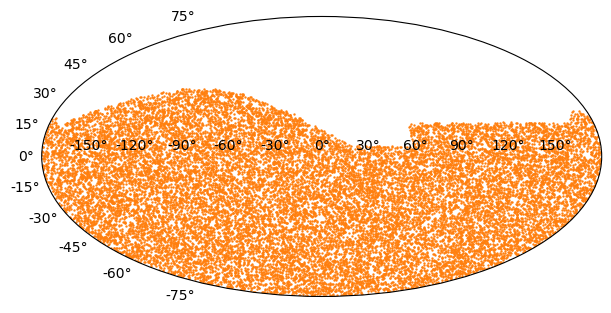

In [9]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(221, projection="mollweide")
im1 = ax1.scatter(opsim_ra.radian, opsim_dec.radian, s=0.5, c="C1")

## Visualising the observing strategy

In [10]:
def create_sky_pointings(N, dec_low=-90, dec_high=40):
    """
    Creates random points on a sphere (limited between dec_low and dec_high).
    Acception fraction of points is around 2/3, so sample ~1.6 times as many points.

    :param N: number of desired points inside the LSST footprint. The actual initiated number is 1.6 times higher
    :param dec_low: lower declination limit
    :param dec_high: upper declination limit
    :return: two arrays containing the x-coordinates (right ascension) and y-coordinates (declination) of random sky pointings
    """

    if N < 10:
        sample_number = int(N * 5)
    else:
        sample_number = int(N * 1.6)

    ra_points = np.random.uniform(low=0, high=360, size=sample_number)
    dec_points = np.arcsin(2 * np.random.uniform(size=sample_number) - 1) / np.pi * 180

    dec_selection = (dec_points > dec_low) & (dec_points < dec_high)
    ra_points = ra_points[dec_selection]
    dec_points = dec_points[dec_selection]

    return ra_points, dec_points

In [11]:
def get_Nobs_MJD(ra, dec, MJD):
    """
    Calculates the following properties for any dates < MJD
    opsim_ra: RA from OpSim
    opsim_dec: DEC from OpSim
    Nobs: Number of observations
    Nobs_10: Number of observations of that point after the full LSST duration
    orig_ra: input ra
    orig_dec: input dec
    """
    
    gen = synopsim.pointingsEnclosing(ra, dec, circRadius=0., pointingRadius=1.75, 
                                  usePointingTree=True)

    opsim_ra_list, opsim_dec_list, Nobs, Nobs_10 = [], [], [], []
    orig_ra, orig_dec = [], []
    

    for p in range(len(ra)):

        obs = next(gen)
        obs = obs.sort_values(by=['expMJD'])

        opsim_ra = np.mean(obs['fieldRA'])
        opsim_dec = np.mean(obs['fieldDec'])
        opsim_mjd = obs['expMJD']

        if np.isnan(opsim_ra) or np.isnan(opsim_dec):
            continue
            
        indices = opsim_mjd < MJD
            
        times = opsim_mjd[indices]
        
        if len(opsim_mjd[indices]) > 0.0:
            Nobs.append(len(opsim_mjd[indices]))
            Nobs_10.append(len(opsim_mjd))
            opsim_ra_list.append(opsim_ra)
            opsim_dec_list.append(opsim_dec)
            orig_ra.append(ra[p])
            orig_dec.append(dec[p])
            
    Nobs = np.array(Nobs)
    Nobs_10 = np.array(Nobs_10)
    opsim_ra_list = np.array(opsim_ra_list)
    opsim_dec_list = np.array(opsim_dec_list)
    
    opsim_ra1 = coord.Angle(opsim_ra_list * u.degree)
    opsim_dec = coord.Angle(opsim_dec_list * u.degree)
    opsim_ra = - opsim_ra1.wrap_at(180*u.degree)
    
    orig_ra_list = np.array(orig_ra)
    orig_dec_list = np.array(orig_dec)
    orig_ra1 = coord.Angle(orig_ra_list * u.degree)
    orig_dec = coord.Angle(orig_dec_list * u.degree)
    orig_ra = - orig_ra1.wrap_at(180*u.degree)
    
    return opsim_ra, opsim_dec, Nobs, Nobs_10, orig_ra, orig_dec

In [12]:
ra, dec = create_sky_pointings(100000)
ra_3, dec_3, Nobs_3, Nobs_3_10, _, _ = get_Nobs_MJD(ra, dec, MJD=61325)

check using ptree True


### Distinguishing WFD / DDF / galactic plane regions

Cuts based on number of visits after 10 years of LSST observations ($N_{\rm visits, 10}$) <br> <br>
Galactic plane / polar regions: $N_{\rm visits, 10}$ < 400 <br>
WFD: 400 < $N_{\rm visits, 10}$ < 1000 <br>
DDF: $N_{\rm visits, 10}$ > 1000

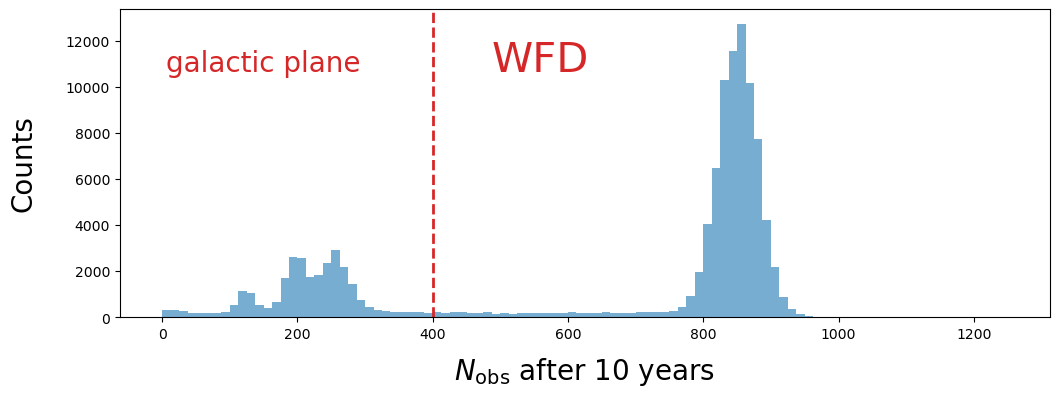

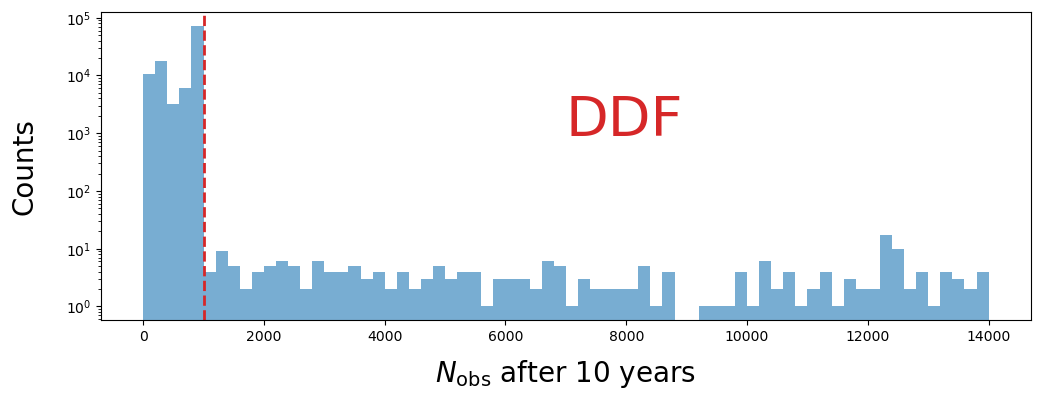

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.hist(Nobs_3_10, bins=100, alpha=0.6, range=(0, 1250))
plt.ylabel('Counts', fontsize=20, labelpad=20)
plt.xlabel(r'$N_{\rm obs}$ after 10 years', fontsize=20, labelpad=10)
plt.axvline(x=400, ls='--', color='C3', lw=2)
plt.text(0.4, 0.8, 'WFD', fontsize=30, color='C3', transform=ax.transAxes)
plt.text(0.05, 0.8, 'galactic plane', fontsize=20, color='C3', transform=ax.transAxes)
#plt.savefig("../Results/Figures/Nobs_threshold_WFD.png", transparent=False, facecolor='white', dpi=250, bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.hist(Nobs_3_10, bins=70, alpha=0.6, range=(0, 14000))
plt.ylabel('Counts', fontsize=20, labelpad=20)
plt.xlabel(r'$N_{\rm obs}$ after 10 years', fontsize=20, labelpad=10)
plt.axvline(x=1000, ls='--', color='C3', lw=2)
plt.text(0.5, 0.6, 'DDF', fontsize=40, color='C3', transform=ax.transAxes)
plt.yscale('log')
#plt.savefig("../Results/Figures/Nobs_threshold_DDF.png", transparent=False, facecolor='white', dpi=250, bbox_inches='tight')


In [14]:
# DDF coordinates
DDF_ra = coord.Angle(np.array([345.97, 31.04, 40.29, 150.70, 61.24]), u.degree)
DDF_dec = coord.Angle(np.array([-43.18, -17.90, -45.47, -9.39, -48.42]), u.degree)
DDF_ra = coord.Angle(np.array([150.08, 53.17, 59.41, 63.11, 9.43, 35.74]), u.degree)
DDF_dec = coord.Angle(np.array([2.16, -28.03, -49.15, -47.79, -43.94, -4.75]), u.degree)
DDF_ra = - DDF_ra.wrap_at(180*u.degree)

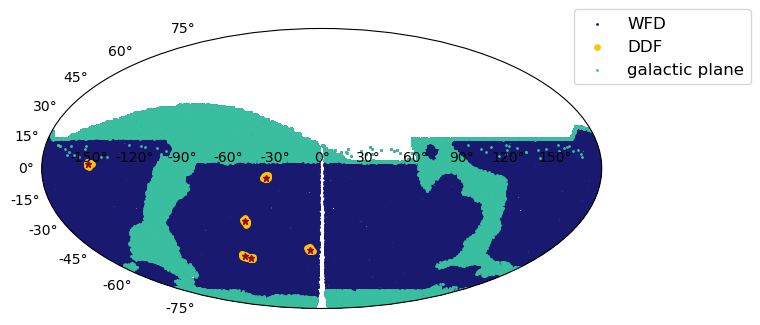

In [15]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(221, projection="mollweide")
im1 = ax1.scatter(ra_3.radian, dec_3.radian, s=1, c='Midnightblue', label='WFD')
im1 = ax1.scatter(ra_3.radian[Nobs_3_10 > 1000], dec_3.radian[Nobs_3_10 > 1000], s=15, c='#fcc603', label='DDF')
im1 = ax1.scatter(ra_3.radian[Nobs_3_10 < 400], dec_3.radian[Nobs_3_10 < 400], s=1, c='#39bfa0', label='galactic plane')
ax1.plot(DDF_ra.radian, DDF_dec.radian, '*', color='#94062e', ms=5)
plt.legend(loc=(0.95, 0.8), fontsize=12)

### Active versus background regions 

Cuts based on number of visits after 3 years of LSST observations ($N_{\rm visits, 3}$) <br> <br>

Background: $N_{\rm visits, 3}$ < 255 <br>
Active: $N_{\rm visits, 3}$ > 255

Text(0.8, 0.5, 'active')

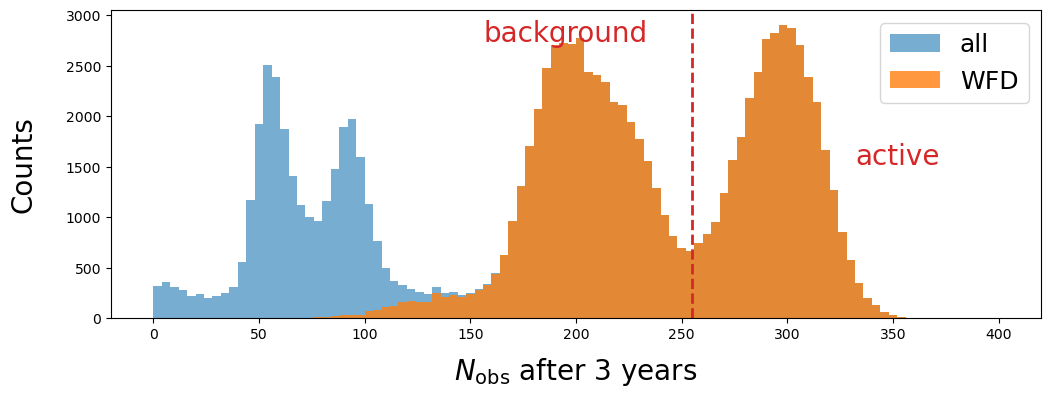

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.hist(Nobs_3, bins=100, alpha=0.6, range=(0, 400), label="all")
plt.hist(Nobs_3[Nobs_3_10 > 400], bins=100, alpha=0.8, range=(0, 400), color='C1', label="WFD")
plt.ylabel('Counts', fontsize=20, labelpad=20)
plt.xlabel(r'$N_{\rm obs}$ after 3 years', fontsize=20, labelpad=10)
plt.legend(fontsize=18)
plt.axvline(x=255, ls='--', color='C3', lw=2)
plt.text(0.4, 0.9, 'background', fontsize=20, color='C3', transform=ax.transAxes)
plt.text(0.8, 0.5, 'active', fontsize=20, color='C3', transform=ax.transAxes)

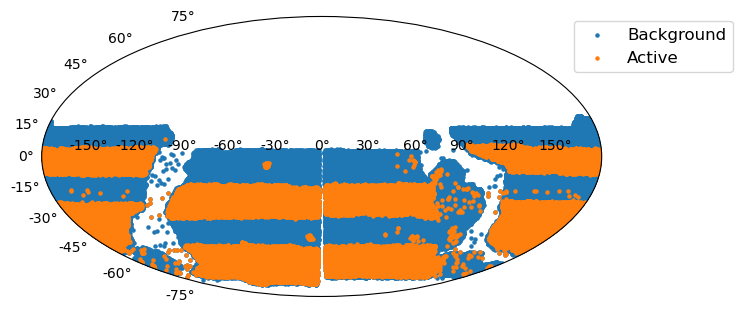

In [27]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(221, projection="mollweide")
im1 = ax1.scatter(ra_3.radian[Nobs_3_10 > 400], dec_3.radian[Nobs_3_10 > 400], s=5, c='C0', label='Background')
im1 = ax1.scatter(ra_3.radian[Nobs_3 > 255], dec_3.radian[Nobs_3 > 255], s=5, c='C1', label='Active')
plt.legend(loc=(0.95, 0.8), fontsize=12)

### 10 years of LSST observations

In [18]:
ra, dec = create_sky_pointings(100000)

MJD = 60768  # Yr 1.5
MJD = 61325  # Yr 3.
MJD = 65000
MJD = 61325 + 557  # Yr. 4.5
MJD_years = [60586, 60951, 61316, 61681, 62047, 62412, 62777, 63142, 63508, 63873]
ra_years, dec_years, Nobs_years = [], [], []

for y in MJD_years:
    test_ra, test_dec, test_Nobs, test_Nobs_10, _, _ = get_Nobs_MJD(ra, dec, MJD=y)
    ra_years.append(test_ra)
    dec_years.append(test_dec)
    Nobs_years.append(test_Nobs)

check using ptree True
check using ptree True
check using ptree True
check using ptree True
check using ptree True
check using ptree True
check using ptree True
check using ptree True
check using ptree True
check using ptree True


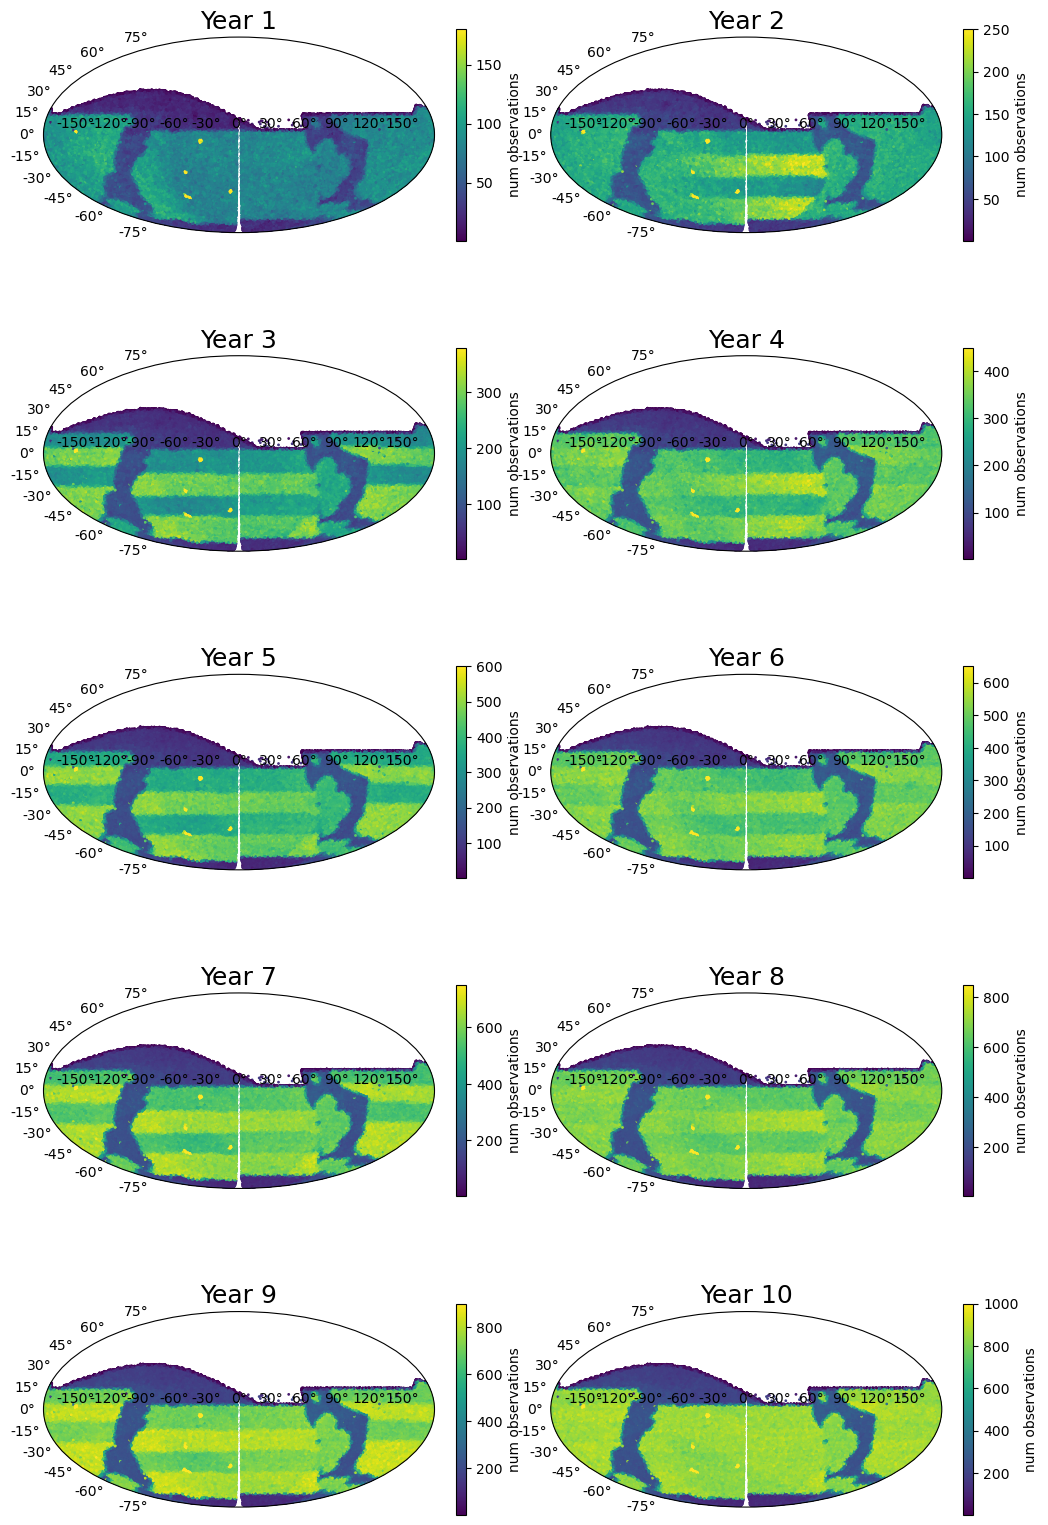

In [28]:
cutoff_years = [180, 250, 380, 450, 600, 650, 750, 850, 900, 1000]

fig = plt.figure(figsize=(12, 20))
for y in range(len(MJD_years)):
    Nobs_years[y][Nobs_years[y] > cutoff_years[y]] = cutoff_years[y]

    ax1 = fig.add_subplot(5,2,y+1, projection="mollweide")
    im1 = ax1.scatter((ra_years[y]).radian, (dec_years[y]).radian, s=1, c=Nobs_years[y])
    fig.colorbar(im1, ax=ax1, label="num observations", fraction=0.025)
    ax1.set_title("Year " + str(y+1), fontsize=18)
    

## Funtions to get cadence information

In [20]:
def create_sky_pointings(N, dec_low=-90, dec_high=40):
    """
    Creates random points on a sphere (with limited declination).
    Acception fraction of points is around 2/3, so sample ~1.6 times as many points.
    """
    
    sample_number = int(N * 1.6)
    print(sample_number)
    ra_points = np.random.uniform(low=0, high=360, size=sample_number)
    dec_points = np.arcsin(2 * np.random.uniform(size=sample_number) - 1) / np.pi * 180

    dec_selection = (dec_points > dec_low) & (dec_points < dec_high)
    ra_points = ra_points[dec_selection]
    dec_points = dec_points[dec_selection]

    return ra_points, dec_points

In [21]:
def initialise_opsim_summary(ra_pointings, dec_pointings):
    myopsimv3 = '../data/OpSim_databases/draft2_rw0.9_uz_v2.99_10yrs.db'
    
    #synopsim = SynOpSim.fromOpSimDB(myopsimv3, opsimversion='fbsv2', usePointingTree=True, use_proposal_table=False,
    #                           subset='unique_all')
    
    gen = synopsim.pointingsEnclosing(ra_pointings, dec_pointings, circRadius=0., pointingRadius=1.75, 
                                  usePointingTree=True)
    return gen

In [22]:
def opsim_observation(gen):
    
    while True:
    
        obs = next(gen)
        opsim_ra = np.mean(obs['fieldRA'])
        opsim_dec = np.mean(obs['fieldDec'])

        print(opsim_ra, opsim_dec)

        if np.isnan(opsim_ra) or np.isnan(opsim_dec):
            print("Not accepted")
            continue
                
        print("Accepted!")
        obs = obs.sort_values(by=['expMJD'])
        
        opsim_times = obs['expMJD']
        opsim_filters = obs['filter']
        opsim_psf = obs['seeingFwhmGeom']
        opsim_lim_mag = obs['fiveSigmaDepth']
        opsim_sky_brightness = obs['filtSkyBrightness']
        break

    print(" ")
    return opsim_ra, opsim_dec, opsim_times, opsim_filters, opsim_psf, opsim_lim_mag, opsim_sky_brightness
   

In [23]:
def select_operation_years(times, filters, psf, lim_mag, sky_brightness, mjd_cutoff=61325):
    
    indices = times < mjd_cutoff
    
    return times[indices], filters[indices], psf[indices], lim_mag[indices], sky_brightness[indices]
    

## Example

In [31]:
ra_pointings, dec_pointings = create_sky_pointings(N=3000)
gen = initialise_opsim_summary(ra_pointings, dec_pointings)

ra, dec, times, filters, psf, lim_mag, sky_brightness = opsim_observation(gen)

print(times)

4800
check using ptree True
78.94676998239972 -1.320422845732702
Accepted!
 
obsHistID
5956       60225.384192
11774      60232.366503
12998      60234.348124
17591      60241.247901
17641      60241.271783
               ...     
2074712    63847.375573
2084904    63868.379185
2084931    63868.391524
2085672    63869.335105
2085722    63869.358284
Name: expMJD, Length: 845, dtype: float64


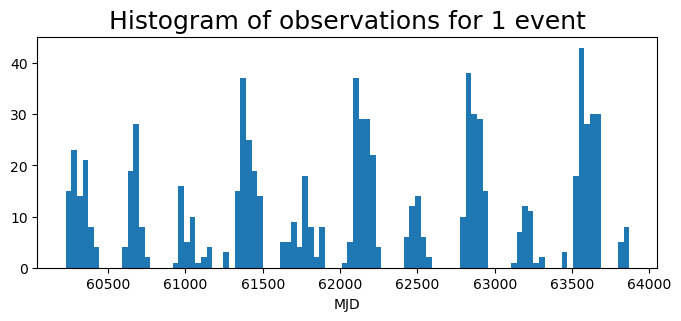

In [32]:
plt.figure(figsize=(8, 3))
plt.hist(times, bins=100)
plt.title("Histogram of observations for 1 event", fontsize=18)
plt.xlabel("MJD")
plt.show()

In [26]:
# Cut data after 3 years
times, filters, psf, lim_mag, sky_brightness = select_operation_years(times, filters, psf, lim_mag, sky_brightness)

print(times)

obsHistID
76003     60336.370556
85000     60348.378403
89998     60355.372286
90000     60355.373184
90023     60355.384826
              ...     
565892    61213.043194
568937    61224.122704
583858    61245.039492
587907    61252.033496
587957    61252.057857
Name: expMJD, Length: 175, dtype: float64
